In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
import seaborn as sns


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
Outcome_true_count = len(df.loc[df['Outcome'] == True])
Outcome_false_count = len(df.loc[df['Outcome'] == False])

In [9]:
(Outcome_true_count,Outcome_false_count)

(268, 500)

In [10]:
x = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [11]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=0)

In [13]:
print(x_train.shape)
print(x_train)

(614, 8)
[[7.00e+00 1.50e+02 7.80e+01 ... 3.52e+01 6.92e-01 5.40e+01]
 [4.00e+00 9.70e+01 6.00e+01 ... 2.82e+01 4.43e-01 2.20e+01]
 [0.00e+00 1.65e+02 9.00e+01 ... 5.23e+01 4.27e-01 2.30e+01]
 ...
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [5.00e+00 1.36e+02 8.20e+01 ... 0.00e+00 6.40e-01 6.90e+01]]


In [14]:
print(y_train.shape)
print(y_train)

(614,)
[1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 0 1 0 0 0 0

In [15]:
print(x_test.shape)
print(x_test)

(154, 8)
[[1.000e+00 1.990e+02 7.600e+01 ... 4.290e+01 1.394e+00 2.200e+01]
 [2.000e+00 1.070e+02 7.400e+01 ... 3.360e+01 4.040e-01 2.300e+01]
 [4.000e+00 7.600e+01 6.200e+01 ... 3.400e+01 3.910e-01 2.500e+01]
 ...
 [4.000e+00 1.420e+02 8.600e+01 ... 4.400e+01 6.450e-01 2.200e+01]
 [3.000e+00 1.160e+02 7.400e+01 ... 2.630e+01 1.070e-01 2.400e+01]
 [1.000e+00 1.070e+02 7.200e+01 ... 3.080e+01 8.210e-01 2.400e+01]]


In [16]:
print(y_test.shape)
print(y_test)

(154,)
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [18]:
pd.DataFrame(x_train,columns=df.columns[:-1]).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-3.553075e-17,7.142314e-18,1.900398e-16,5.207561e-17,2.896706e-16,-3.102838e-15,1.580712e-15,-3.905671e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.126063e+00,-3.803690e+00,-3.543717e+00,-1.285816e+00,-6.996567e-01,-4.072759e+00,-1.166818e+00,-1.048981e+00
25%,-8.354355e-01,-6.888968e-01,-3.699205e-01,-1.285816e+00,-6.996567e-01,-5.951922e-01,-6.862388e-01,-7.991138e-01
50%,-2.541807e-01,-1.068395e-01,1.419821e-01,1.481486e-01,-3.844838e-01,2.444697e-02,-2.927647e-01,-3.826685e-01
75%,6.177016e-01,6.325306e-01,5.515042e-01,7.560247e-01,4.077076e-01,5.776962e-01,4.205946e-01,6.168003e-01
max,3.814603e+00,2.425896e+00,2.701495e+00,4.886465e+00,6.506730e+00,4.412504e+00,5.867657e+00,3.948363e+00


In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [20]:
def disp_cm(y_test,y_pred)-> float:
    acc_score = accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True,fmt="d")
    plt.title(f"Accuracy: {acc_score:0.3f}")
    plt.xlabel("Predicated labels")
    plt.ylabel("Actual labels")
    plt.show()
    return acc_score

In [21]:
def judge_clf(classifier,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)-> float:
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc_score = disp_cm(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    return acc_score

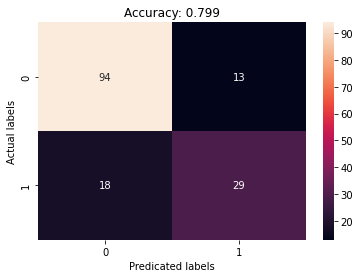

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



In [22]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0)
log_acc = judge_clf(log_clf)

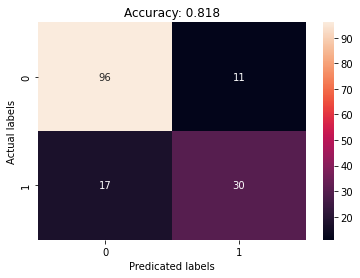

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knn_acc = judge_clf(knn_clf)

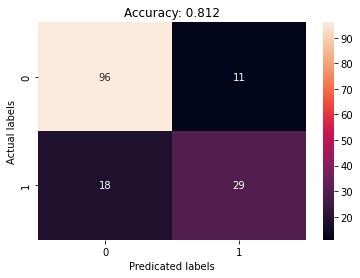

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



In [25]:
from sklearn.svm import SVC
lsvm = SVC(kernel="linear",random_state=0)
lsvm_acc = judge_clf(lsvm)

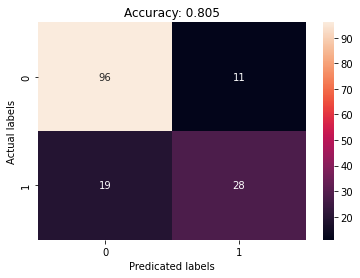

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



In [26]:
ksvm = SVC(kernel="rbf",random_state=0)
ksvm_acc = judge_clf(ksvm)

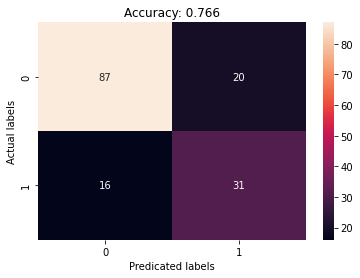

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154



In [27]:
from sklearn.naive_bayes import GaussianNB
nb_clf =  GaussianNB()
naiveb_acc = judge_clf(nb_clf)

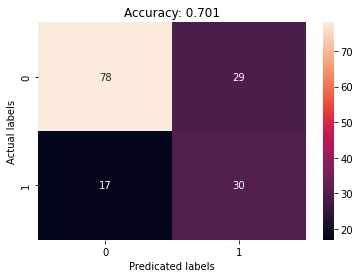

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       107
           1       0.51      0.64      0.57        47

    accuracy                           0.70       154
   macro avg       0.66      0.68      0.67       154
weighted avg       0.73      0.70      0.71       154



In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
dtree_acc = judge_clf(dtree_clf)

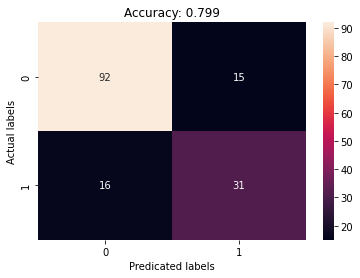

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154



In [29]:
from sklearn.ensemble import RandomForestClassifier
rfor_clf = RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
rfor_acc = judge_clf(rfor_clf)

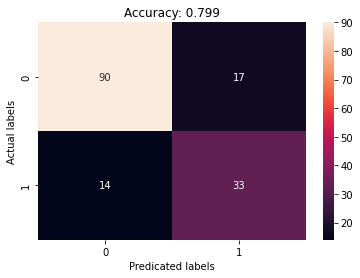

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       107
           1       0.66      0.70      0.68        47

    accuracy                           0.80       154
   macro avg       0.76      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



In [30]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False,verbosity=0)
xgb_acc = judge_clf(xgb_clf)

In [32]:
import warnings

In [33]:
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore",category=ConvergenceWarning)

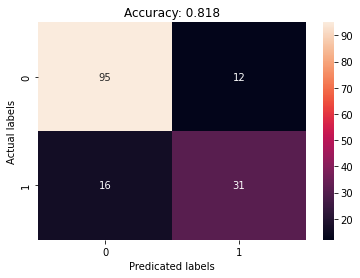

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154



In [34]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=0)
mlp_acc = judge_clf(mlp_clf)

In [49]:
models = pd.DataFrame({
    'Model':["Logistic Regr","KNN","SVM-Linear","SVM-RBF","Navie Bayes","Decision-Tree","Random Forest","XGB","MLP"],
    'Accuracy Score':[log_acc,knn_acc,lsvm_acc,ksvm_acc,naiveb_acc,dtree_acc,rfor_acc,xgb_acc,mlp_acc]
})

models.sort_values(by = 'Accuracy Score',ascending = False,ignore_index=True)

,Model,Accuracy Score
0,KNN,0.818182
1,MLP,0.818182
2,SVM-Linear,0.811688
3,SVM-RBF,0.805195
4,Logistic Regr,0.798701
5,Random Forest,0.798701
6,XGB,0.798701
7,Navie Bayes,0.766234
8,Decision-Tree,0.701299


In [36]:
from sklearn.model_selection import cross_val_score
def perform_kfold(clf,x_train=x_train,y_train=y_train)->(float, float):
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=10)
    mean_score = scores.mean()
    std_score = scores.std()
    print(f"Mean Accuracy : {mean_score*100:0.3f}%")
    print(f"Standard Deviation: {std_score*100:0.3f}%")
    return mean_score,std_score

In [37]:
log_macc,log_std = perform_kfold(log_clf)

Mean Accuracy : 75.724%
Standard Deviation: 4.676%


In [38]:
lsvm_macc,lsvm_std = perform_kfold(lsvm)

Mean Accuracy : 75.724%
Standard Deviation: 4.389%


In [39]:
ksvm_macc,ksvm_std = perform_kfold(ksvm)

Mean Accuracy : 74.923%
Standard Deviation: 3.702%


In [40]:
naived_macc,naiveb_std = perform_kfold(nb_clf)

Mean Accuracy : 74.268%
Standard Deviation: 5.511%


In [41]:
dtree_macc,dtree_std =  perform_kfold(dtree_clf)

Mean Accuracy : 70.510%
Standard Deviation: 5.538%


In [42]:
rfor_macc, rfor_std = perform_kfold(rfor_clf)

Mean Accuracy : 74.283%
Standard Deviation: 5.753%


In [43]:
xgb_macc,xgb_std = perform_kfold(xgb_clf)

Mean Accuracy : 72.795%
Standard Deviation: 6.072%


In [44]:
mlp_macc,mlp_std= perform_kfold(mlp_clf)

Mean Accuracy : 76.050%
Standard Deviation: 5.239%


In [50]:
knn_macc,knn_std = perform_kfold(knn_clf)

Mean Accuracy : 72.800%
Standard Deviation: 2.537%


In [51]:
models_1 = pd.DataFrame({
    'Model':["Logistic Regr","KNN","SVM-Linear","SVM-RBF","Navie Bayes","Decision-Tree","Random Forest","XGB","MLP"],
    'Mean Accuracy Score':[log_acc,knn_acc,lsvm_acc,ksvm_acc,naiveb_acc,dtree_acc,rfor_acc,xgb_acc,mlp_acc],
    'Standard Deviation':[log_std,knn_std,lsvm_std,ksvm_std,naiveb_std,dtree_std,rfor_std,xgb_std,mlp_std]
})

models_1.sort_values(by = 'Mean Accuracy Score',ascending = False,ignore_index=True)

,Model,Mean Accuracy Score,Standard Deviation
0,KNN,0.818182,0.025371
1,MLP,0.818182,0.052393
2,SVM-Linear,0.811688,0.043892
3,SVM-RBF,0.805195,0.037022
4,Logistic Regr,0.798701,0.046762
5,Random Forest,0.798701,0.057530
6,XGB,0.798701,0.060722
7,Navie Bayes,0.766234,0.055114
8,Decision-Tree,0.701299,0.055380
